In [1]:
def legcolor(leg):
    "function that gives back the color of legend elements, even if they are markers"
    for artist, text in zip(leg.legendHandles, leg.get_texts()):
            try:
                legcol = artist.get_color()
            except:
                legcol = artist.get_facecolor()
            if isinstance(legcol, np.ndarray):
                legcol = legcol[0]
            text.set_color(legcol)

In [2]:
#from old sam module, sam.ncopen
import netCDF4
def ncopen(filename, varnames, ind=slice(None)):
    "open ncfiles and load selected variables"

    if type(varnames) == str:
        varnames = [varnames]

    data = {}

    #ncfile = netCDF4.Dataset(filename)
    if type(filename) == str:
        ncfile = netCDF4.Dataset(filename)
    else:
        ncfile = netCDF4.MFDataset(filename)


    # load coords
    nind = ind if type(ind) == list else [ind]+3*[slice(None)]
    n = 0
    for coord in ['time','z','y','x']:
        try:
            data[coord] = ncfile.variables[coord][nind[n]]
            n += 1
        except (KeyError):
            #print('no {} dimension in file'.format(coord))
            pass

 #load variables
    for var in varnames:
        #print(ind)
        data[var] = ncfile.variables[var][ind]

    return data

Notes for SAM output
RADQRC is DIAGNOSTIC!!!
RADQRCLW and RADQRCSW are taken directly from the  code, so I used these

-------------------
cloud at  295 K at altitudes  9p5-11p5km
max HR= 5.652413
max HR= 1.1478317
-------------------
cloud at  305 K at altitudes  12p25-14p25km
max HR= 8.181584
max HR= 1.6121957


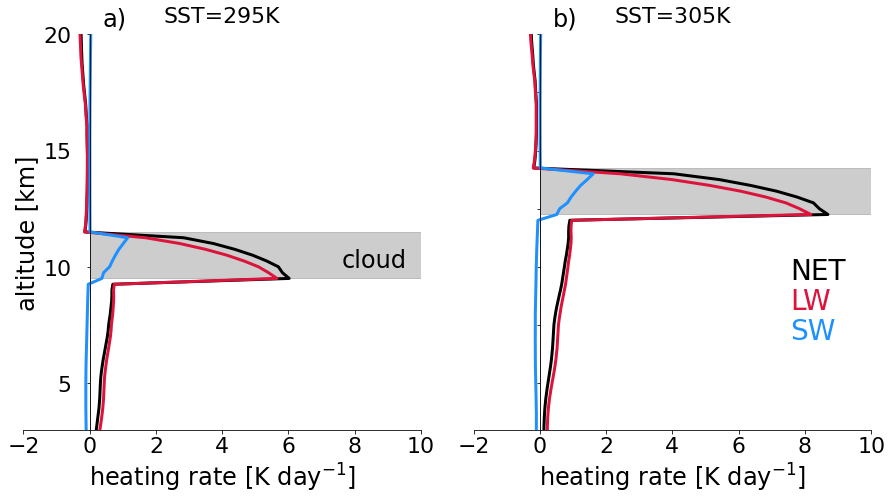

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle


plt.rcParams.update({'font.size': 22}) #all to 22 if not specified other

#####datat#############
path2d ='../data/SAM/' 
varname = ['z','TABS','RADQR','RADQRLW','RADQRSW','SWNTOA','LWNTOA','LWNTOAC','SWNTOAC','LWNT','LWNS','LWDS','RADLWUP','RADLWDN',
           'RADSWUP','RADSWDN','CLD','RHO','RADQRCLW','RADQRCSW','RADQRC']

names  = ['9p5-11p5km','12p25-14p25km'] #base temp 0.8 K warmer in the 305K case

temps = ['295','305']

col = ['k','crimson','dodgerblue','c']

var = ['RADQR','RADQRLW','RADQRSW'] #full sky
cvar = ['RADQRCLW','RADQRCLW','RADQRCSW'] #clear sky 


vvars = ['NET','LW','SW']
left = [0,10]
right = [9,19]

y1 = [9.5,12.25]
y2 = [11.5,14.25]
cod = ['SST=295','SST=305']
#############################
abc = ['a','b','c','d','e','f']
##################################

plt.close()
fig = plt.figure()
fig.set_size_inches(16,16,forward=True)
gs = gridspec.GridSpec(2,20,height_ratios=[1,1],width_ratios=20*[1])
for t, name in enumerate(names):
    print('-------------------')
    print('cloud at ', temps[t], 'K', 'at altitudes ',name)

    ax = fig.add_subplot(gs[0,left[t]:right[t]])
    data_2d = ncopen(path2d+'BARcirrus_'+temps[t]+'K_P3_128x128_cld8_r20-r30_'+name+'_cod1.nc',varname,ind=slice(None))
    alt = data_2d['z'].squeeze()

    for v in range(0,3):
        if v==0:
            qrad = data_2d[var[v]][0].squeeze() - data_2d[cvar[0]][0].squeeze() - data_2d[cvar[2]][0].squeeze()
        else:
            qrad = data_2d[var[v]][0].squeeze() - data_2d[cvar[v]][0].squeeze()
            print('max HR=',np.max(qrad))

        plt.plot(qrad,alt/1000,color=col[v],linewidth=3)
        plt.ylim(3,20)
        plt.xlim(-0.5,10)
        ax.add_patch(Rectangle((0, y1[t]), 10, 2,color='gray',alpha=0.15)) #cloud shading

    plt.axvline(0, color='grey',linewidth=1.)
    ax.get_xaxis().set_ticks([-2,0,2,4,6,8,10])
    if t==0:
        plt.ylabel('altitude [km]',size=24)
        ax.tick_params(axis='y', which='major', pad=15)
        ax.get_yaxis().set_ticks([5,10,15,20])
        plt.text(0.965,0.46,'cloud',transform=ax.transAxes,horizontalalignment='right',\
        verticalalignment='top',fontsize=24,color='black')
    if t==1:
        ax.get_yaxis().set_ticklabels([])
        leg = plt.legend(vvars,loc='best',fontsize=28,frameon=False,handlelength=0,
                         markerscale=0,labelspacing=0.07,bbox_to_anchor=(0.5, 0., 0.5, 0.5))#prop=legend_properties)
        legcolor(leg)
        leg.set_zorder(0)
        ax.add_patch(Rectangle((6, 6), 1.5, 5,color='white',alpha=1))#white shading over legend dots
    plt.xlabel('heating rate [K day$^{-1}$]',size=24)
    plt.title(''+cod[t]+'K',size=22,y=1.015)

    plt.text(0.2,1.07,abc[t]+')',transform=ax.transAxes,horizontalalignment='left',
             verticalalignment='top',fontsize=24,color='black',bbox=dict(facecolor='white', edgecolor='none', pad=1))

    ax.spines['left'].set_position(('data',0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_bounds(-2.,10)

#plt.savefig('path-to-file/Fig1_basefix_SAM_cod1_RCE295_vs_RCE305.pdf',bbox_inches='tight') 